# Data Anaylsis

## 1. Import Libraries & Data

### Import Libraries/Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

%matplotlib inline

sns.set_style('ticks')

In [2]:
df = pd.read_csv('./clean_data/merged_tables.csv')

/Users/rezarad/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df = df.drop('Unnamed: 0', axis=1)

In [4]:
df['DATETIME_MTA'] = pd.to_datetime(df['DATETIME_MTA'], format='%Y-%m-%d %H:%M:%S')

In [5]:
df['DAY'] = df['DATETIME_MTA'].apply(lambda x: x.dayofyear)

In [6]:
df['HOUR'] = df['DATETIME_MTA'].apply(lambda x: x.hour)

In [7]:
df = df.loc[df['DATETIME_MTA'] >= pd.datetime(2017, 1, 1)]

In [8]:
df = df.dropna()

In [9]:
df.dtypes

LINENAME                    object
STATION_MTA                 object
DATETIME_MTA        datetime64[ns]
ENTRIES                      int64
EXITS                        int64
GTFS Latitude              float64
GTFS Longitude             float64
STATION_WEATHER             object
STATION_NAME                object
LATITUDE                   float64
LONGITUDE                  float64
DATETIME_WEATHER            object
HOURLYPrecip               float64
DAY                          int64
HOUR                         int64
dtype: object

In [11]:
df.shape

(6007096, 15)

## 2. Data Exploration

In [13]:
print 'With Precipitation:\n{0}'.format(df.loc[df['HOURLYPrecip'] > 0, ['ENTRIES', 'EXITS']].agg([np.mean, np.std]))
print 'Without Precipitation:\n{0}'.format(df.loc[df['HOURLYPrecip'] == 0, ['ENTRIES', 'EXITS']].agg([np.mean, np.std]))

With Precipitation:
         ENTRIES       EXITS
mean  188.761356  141.613214
std   215.734354  174.362745
Without Precipitation:
         ENTRIES       EXITS
mean  180.857869  136.764057
std   223.012668  179.551911


There seems to be a slight decrease in ridership when theres 'precipitation' vs. 'no precipitation'. Let's explore whether there's a relationship dependent on the amount of precipitation.

#### Grouping the Data by the Hour

In [17]:
gb_day_hr = df.loc[:, ['DAY', 'HOUR', 'HOURLYPrecip', 'ENTRIES', 'EXITS']].groupby(['DAY','HOUR']).mean()

In [29]:
hourly_precip = gb_day_hr['HOURLYPrecip'].values.tolist()
avg_entries = gb_day_hr['ENTRIES'].values.tolist()
avg_exits = gb_day_hr['EXITS'].values.tolist()

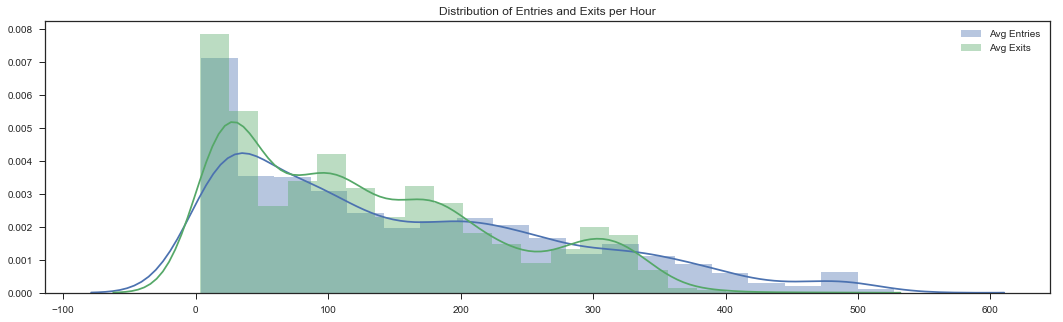

In [38]:
plt.figure(figsize=(18,5))
sns.distplot(avg_entries)
sns.distplot(avg_exits)
plt.title('Distribution of Entries and Exits per Hour')
plt.legend(['Avg Entries', "Avg Exits"])
plt.show()

## 3. Decision Tree Model

In [85]:
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import Normalizer

In [86]:
gb_day_hr.columns

Index([u'HOURLYPrecip', u'ENTRIES', u'EXITS'], dtype='object')

In [87]:
X = gb_day_hr['ENTRIES'].values.tolist()
y = gb_day_hr['HOURLYPrecip'].values.tolist()

In [88]:
split = int(len(X)*.8)

In [89]:
X_test, y_test = X[split:], y[split:]
X_train, y_train = X[:split], y[:split]

In [90]:
dt = DecisionTreeRegressor(max_depth=9, min_samples_leaf=1)

In [97]:
len(y_train)
# len(y_test)

1976